In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# making new columns with name : Age_median Age_mean Fare_median Fare_mean
X_train['Age_999']=X_train['Age'].fillna(999)
X_train['Age_minus1']=X_train['Age'].fillna(-1)

X_train['Fare_999']=X_train['Fare'].fillna(999)
X_train['Fare_minus1']=X_train['Fare'].fillna(-1)

In [7]:
X_train.sample(5)

,Age,Fare,Family,Age_999,Age_minus1,Fare_999,Fare_minus1
318,31.0,164.8667,2,31.0,31.0,164.8667,164.8667
453,49.0,89.1042,1,49.0,49.0,89.1042,89.1042
502,NaN,7.6292,0,999.0,-1.0,7.6292,7.6292
844,17.0,8.6625,0,17.0,17.0,8.6625,8.6625
167,45.0,27.9000,5,45.0,45.0,27.9000,27.9000


In [8]:
print("Original age variance :",X_train['Age'].var())
print("Age_999 variance :",X_train['Age_999'].var())
print("Age_minus1 variance :",X_train['Age_minus1'].var())
print(" ")

print("Original fare variance :",X_train['Fare'].var())
print("Fare_999 variance :",X_train['Fare_999'].var())
print("Fare_minus1 variance :",X_train['Fare_minus1'].var())

Original age variance : 210.2517072477438
Age_999 variance : 148855.21230540806
Age_minus1 variance : 315.99550362600644
 
Original fare variance : 2761.031434948639
Fare_999 variance : 47525.47059536007
Fare_minus1 variance : 2675.2394049177087


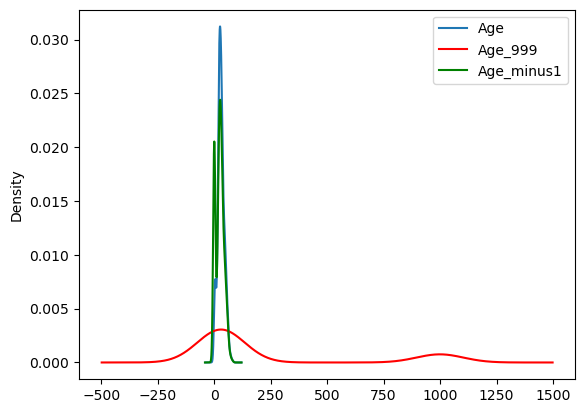

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with 999
X_train['Age_999'].plot(kind='kde',ax=ax,color='red')

#variable imputed with -1
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()  #column name guloi legend name hobe
ax.legend(lines, labels, loc='best')

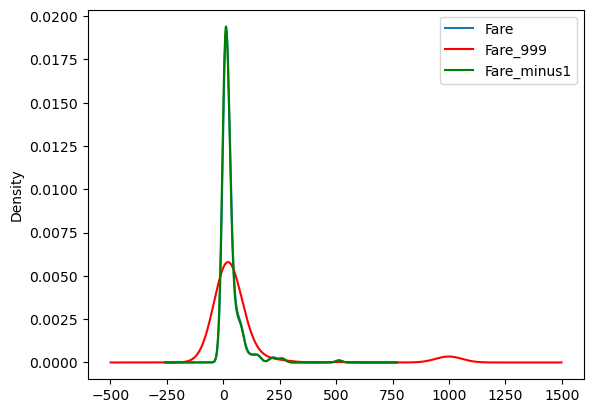

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with 999
X_train['Fare_999'].plot(kind='kde',ax=ax,color='red')

#variable imputed with -1
X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()  #column name guloi legend name hobe
ax.legend(lines, labels, loc='best')

In [11]:
X_train.cov()

,Age,Fare,Family,Age_999,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-2341.722703,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-24.108815,-5.034556,16.878492,17.684447
Age_999,210.251707,-2341.722703,-24.108815,148855.212305,-4508.566357,-4914.922205,-2129.803445
Age_minus1,210.251707,135.785804,-5.034556,-4508.566357,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-4914.922205,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-2129.803445,124.270305,1063.944817,2675.239405


<AxesSubplot:>

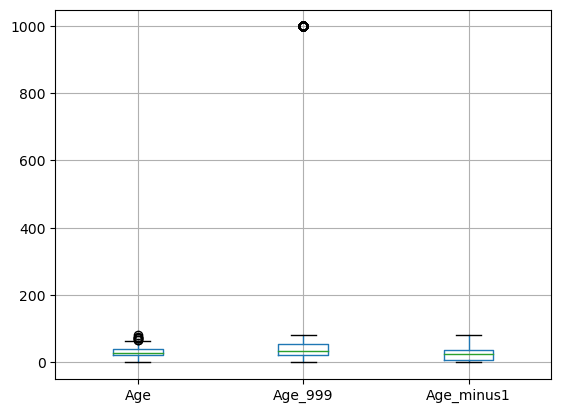

In [12]:
X_train[['Age','Age_999','Age_minus1']].boxplot()

<AxesSubplot:>

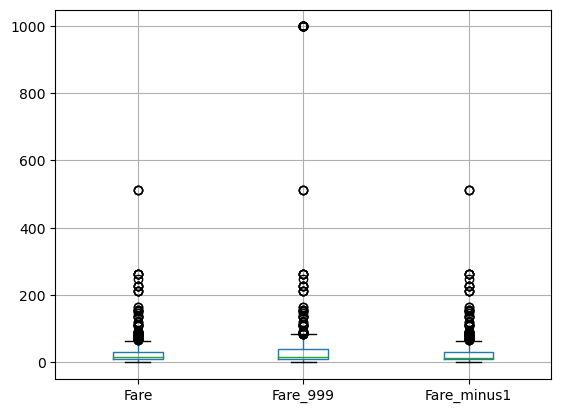

In [13]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot()

## Using sklearn

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='mean',fill_value=999)

In [16]:
trf=ColumnTransformer([('imputer1',imputer1,['Age']),('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [17]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(fill_value=999),
                                 ['Fare'])])